In [1]:
import numpy as np
import matplotlib.pyplot as plt

def compute_gradients(inputs, weights, y_true):
    # Forward pass
    z = np.dot(inputs, weights)
    y_pred = sigmoid(z)
    #y_pred = relu(z)
    # Compute loss
    loss = binary_cross_entropy_loss(y_pred, y_true)
    # Backward pass
    d_loss = binary_cross_entropy_derivative(y_pred, y_true) # Gradient of loss w.r.t. y_pred
    d_activation = sigmoid_derivative(z)# Gradient of sigmoid w.r.t. z
    #d_activation = relu_derivative(z)
    # Gradients for weights and bias
    #d_weights = d_loss * d_activation * inputs # Chain rule: dL/dw
    d_weights = np.dot((d_loss * d_activation).T, inputs) / np.shape(inputs)[0]
    return d_weights, loss.mean(), y_pred

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return x * (x > 0)

def relu_derivative(x):
    return 1. * (x > 0)

# Es importante notar que para este caso NO podemos usar la step
# function como función de activación ya que no es derivable, por eso uitilizamos la sigmoidea.

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Binary cross-entropy loss function
def binary_cross_entropy_loss(y_pred, y_true):
    return -(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15))

# LF derivative
def binary_cross_entropy_derivative(y_pred, y_true):
    return y_pred - y_true

def optimizacion(old_value, gradient, LR):
    new_value = old_value - gradient * LR
    return new_value

# Ejercicio 1.1
a) Utilizando una neurona de dos entradas (x1, x2) y la función de activacion
sigmoidea, programe un código que tomando valores de w1,w2 y b de entrada al azar,
determine los gradientes y los vaya actualizando hasta encontrar un valor optimo, de modo que
la neurona ejecute el AND.

Controle del mismo la cantidad de ciclos de entrenamiento, y el LR.
Consejo: pruebe diferentes valores de LR, e incluso puede utilizar una funciòn donde el LR
decrece a medida que avanza el entrenamiento. Ademas utilice los gradientes promedio (batch)
para la actualizaciòn de los parámetros.

Para monitorear el entrenamiento calcule (y grafique) el avance de la LF en función del número
de ciclo y calcule y muestre los valores finales que obtiene la neurona para cada una de las 4
condiciones de entrada del AND.

Analice los resultados

In [46]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Add bias column
inputs = np.hstack([np.ones((4, 1)),inputs])
y = np.array([[0, 0, 0, 1]])
y = y.reshape(4)
init_w = np.random.rand(3)
init_w[0] = 0

In [47]:
epochs = 10000
LRs = [0.1, 1, 10]
losses = [[] for i in range(len(LRs))]
for i, LR in enumerate(LRs):
    weights = init_w
    for epoch in range(epochs):
        d_weights, loss, y_hat = compute_gradients(inputs, weights, y)
        losses[i].append(loss)
        weights = optimizacion(weights, d_weights, LR)

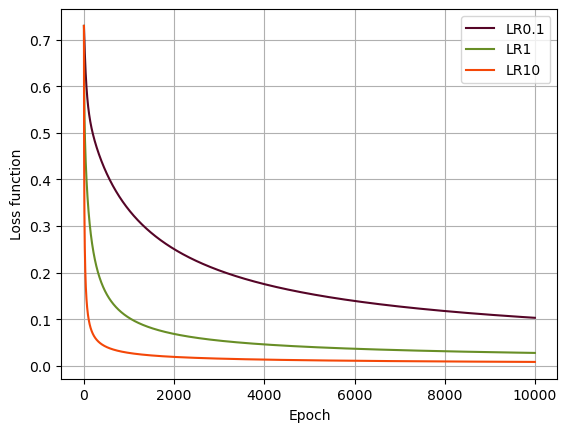

In [48]:
plt.plot(losses[0], color = '#550527', label = 'LR0.1')
plt.plot(losses[1], color = '#688E26', label = 'LR1')
plt.plot(losses[2], color = '#F44708', label = 'LR10')
plt.xlabel("Epoch")
plt.ylabel("Loss function")
plt.legend()
plt.grid()
plt.show()

In [49]:
sigmoid(np.dot(inputs, weights))

array([1.30562950e-06, 1.02181404e-02, 1.02181404e-02, 9.87897705e-01])

In [50]:
# weights, bias, LF and predictions for the LR10 run
print("bias, w1, w2: ", weights)
print("loss function: ", loss)
for i, input in enumerate(inputs):
    print('input values: ', input[1:], 'output: ', y_hat[i])


bias, w1, w2:  [-13.54882395   8.97550399   8.97550399]
loss function:  0.008180129888318014
input values:  [0. 0.] output:  1.3058318917506415e-06
input values:  [0. 1.] output:  0.01021866246722237
input values:  [1. 0.] output:  0.01021866246722237
input values:  [1. 1.] output:  0.9878970857659491


**b) Que pasa si en lugar de una sigmoidea utiliza ReLu?**

Problemas con ReLu:
- No derivable en x = 0 
- Valores de y_pred de 0 rompen la función de binary cross entropy

**c) Se anima a repetir el proceso pero para la función lógica “OR”**

In [52]:
y = np.array([[0, 1, 1, 1]])
y = y.reshape(4)
init_w = np.random.rand(3)
init_w[0] = 0

epochs = 10000
LRs = [0.1, 1, 10]
losses = [[] for i in range(len(LRs))]
for i, LR in enumerate(LRs):
    weights = init_w
    for epoch in range(epochs):
        d_weights, loss, y_hat = compute_gradients(inputs, weights, y)
        losses[i].append(loss)
        weights = optimizacion(weights, d_weights, LR)

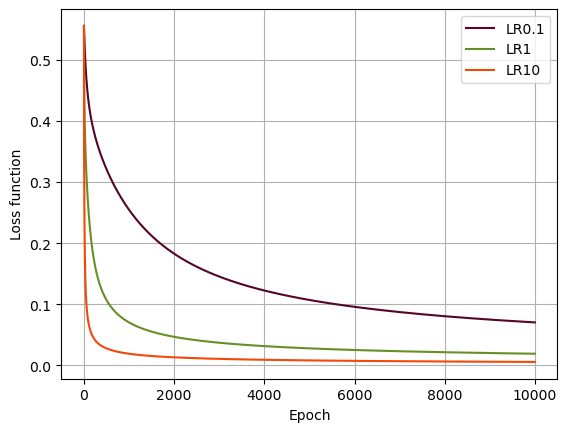

In [53]:
plt.plot(losses[0], color = '#550527', label = 'LR0.1')
plt.plot(losses[1], color = '#688E26', label = 'LR1')
plt.plot(losses[2], color = '#F44708', label = 'LR10')
plt.xlabel("Epoch")
plt.ylabel("Loss function")
plt.legend()
plt.grid()
plt.show()

In [54]:
# weights, bias, LF and predictions for the LR10 run
print("bias, w1, w2: ", weights)
print("loss function: ", loss)
for i, input in enumerate(inputs):
    print('input values: ', input[1:], 'output: ', y_hat[i])

bias, w1, w2:  [-4.57681803  9.61776433  9.61776434]
loss function:  0.005782558250400992
input values:  [0. 0.] output:  0.01018334102606002
input values:  [0. 1.] output:  0.9935736098628821
input values:  [1. 0.] output:  0.9935736097736785
input values:  [1. 1.] output:  0.9999995696028098


**d) ¿que pasa si intenta resolver el “XOR”?**

In [70]:
y = np.array([[0, 1, 1, 0]])
y = y.reshape(4)
init_w = np.random.rand(3)
init_w[0] = 0

epochs = 10000
losses = [] 
weights = init_w
LR = 10
    
for epoch in range(epochs):
    d_weights, loss, y_hat = compute_gradients(inputs, weights, y)
    losses.append(loss)
    weights = optimizacion(weights, d_weights, LR)

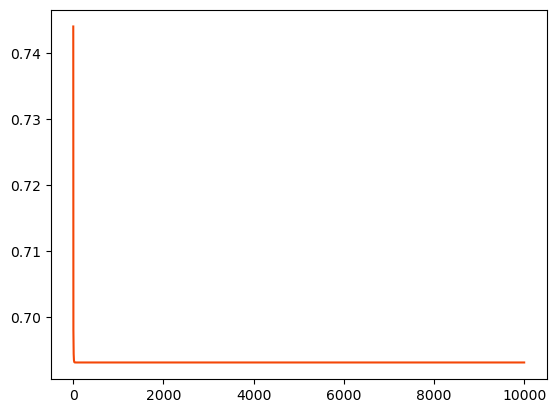

In [71]:
plt.plot(losses, color = '#F44708', label = 'LR10')

In [72]:
print("bias, w1, w2: ", weights)
print("loss function: ", loss)
for i, input in enumerate(inputs):
    print('input values: ', input[1:], 'output: ', y_hat[i])

# No aprende :(

bias, w1, w2:  [-2.91433544e-16  2.08166817e-16  1.94289029e-16]
loss function:  0.6931471805599433
input values:  [0. 0.] output:  0.5
input values:  [0. 1.] output:  0.5
input values:  [1. 0.] output:  0.5
input values:  [1. 1.] output:  0.5
